In [233]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings('ignore')

In [234]:
# Load dataset
df = pd.read_excel('bank-additional-full.xlsx')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [235]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [236]:
# Extracting unique name in target column
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [237]:
# Renaming target column
df.rename(columns={'y': 'deposit'}, inplace=True)

In [238]:
# Mapping target column as binary
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

In [239]:
# Checking statistic description of numeric features 
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.11
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25,0.32
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00


In [240]:
# Checking unique value in every features. It is important for better understanding with dataset.
pd.set_option('display.max_colwidth',1)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), df[col].unique()])
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique','sample unique'],
                     data=listItem)
print(df.shape)
dfDesc

(41188, 21)


,dataFeatures,dataType,null,unique,sample unique
0,age,int64,0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,object,0,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,object,0,4,"[married, single, divorced, unknown]"
3,education,object,0,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,object,0,3,"[no, unknown, yes]"
5,housing,object,0,3,"[no, yes, unknown]"
6,loan,object,0,3,"[no, yes, unknown]"
7,contact,object,0,2,"[telephone, cellular]"
8,month,object,0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,object,0,5,"[mon, tue, wed, thu, fri]"


In [241]:
# Checking duplicate data
sum_duplicated = df.duplicated().sum()
percent_duplicated = df.duplicated().sum()/len(df)
print('total row duplicate = ',sum_duplicated)
print('percentage of duplicate = ',percent_duplicated)

total row duplicate =  12
percentage of duplicate =  0.0002913469942701758


In [242]:
# Removing duplicated data
df = df.drop_duplicates()

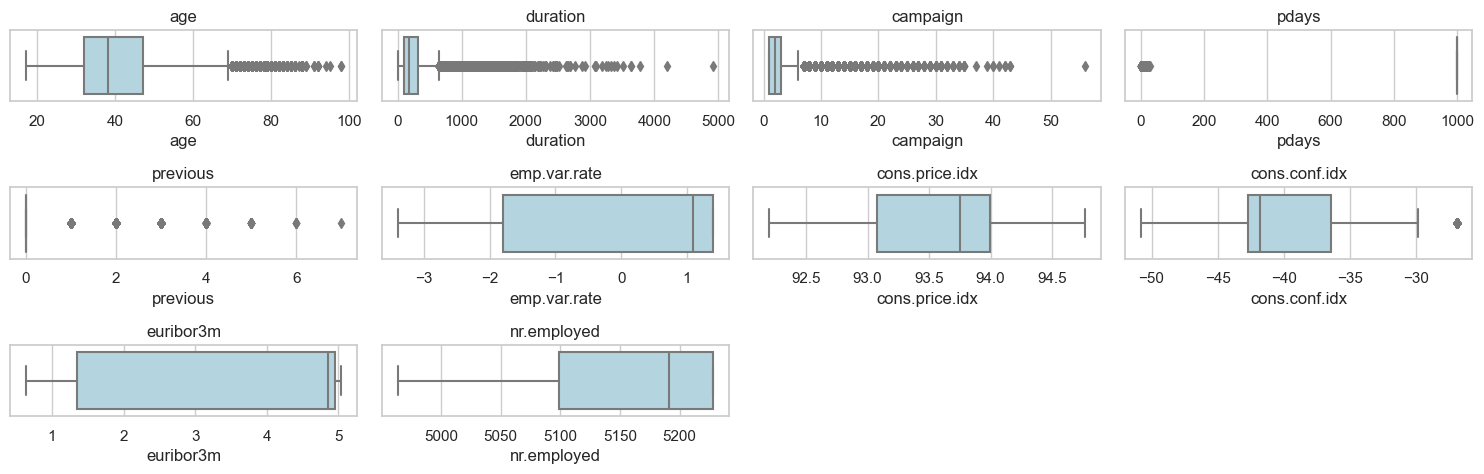

In [243]:
# Checkinging Outliers
num_features = list(df.describe().columns)
num_features.remove('deposit') # Target/ Only 1 and 0 unique


plotnumber = 1

plt.figure(figsize=(15,6))

for kolom in num_features:
    plt.subplot(4,4, plotnumber)
    sns.boxplot(data=df, x=kolom,color='lightblue')
    plt.title(kolom)
    plt.tight_layout()
    plotnumber = plotnumber + 1

# 3. Exploratory Data Analysis (EDA)

In [244]:
# Checking Imbalance data
df['deposit'].value_counts()/len(df)*100

deposit
0    88.733728
1    11.266272
Name: count, dtype: float64

In [245]:
from sklearn.utils import resample

# Pisahkan data menjadi dua kategori deposit
df_deposit_0 = df[df['deposit'] == 0]
df_deposit_1 = df[df['deposit'] == 1]

# Undersampling pada kategori deposit=0
df_deposit_0_sampled = resample(df_deposit_0, replace=False, n_samples=len(df_deposit_1), random_state=42)

# Gabungkan hasil undersampling dengan data deposit=1
df_balance = pd.concat([df_deposit_0_sampled, df_deposit_1])

# Mencetak informasi tentang sampel yang diambil
print(df_balance['deposit'].value_counts())

deposit
0    4639
1    4639
Name: count, dtype: int64


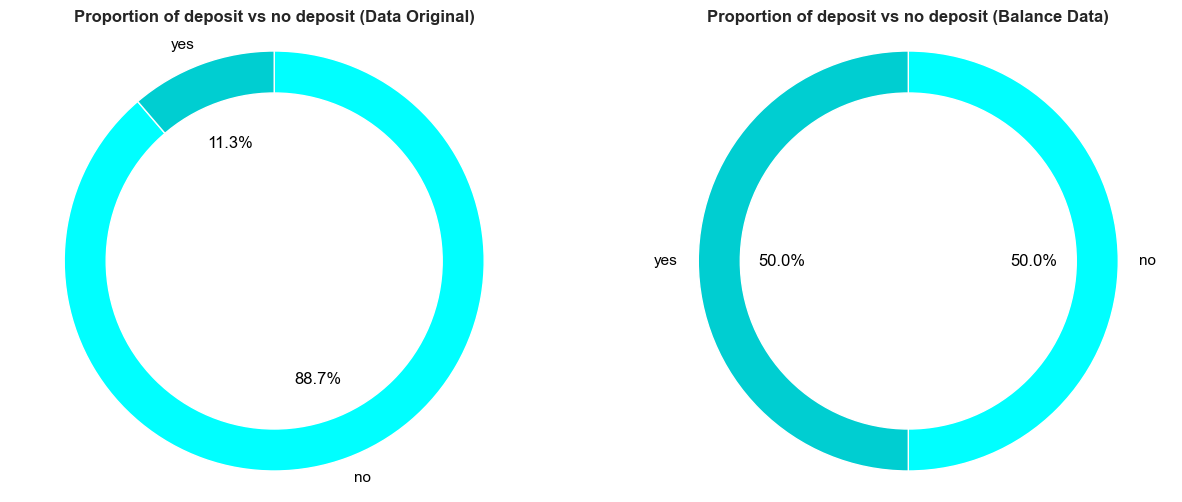

In [246]:
# Plot for df
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) 
plt.pie(df['deposit'].value_counts(), labels=['no', 'yes'], autopct='%1.1f%%', startangle=90, colors=['aqua', 'darkturquoise'], counterclock=False, textprops={'color': 'black'})
plt.axis('equal')
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Proportion of deposit vs no deposit (Data Original)', fontweight='bold')

# Plot for df_balance
plt.subplot(1, 2, 2) 
plt.pie(df_balance['deposit'].value_counts(), labels=['no', 'yes'], autopct='%1.1f%%', startangle=90, colors=['aqua', 'darkturquoise'], counterclock=False, textprops={'color': 'black'})
plt.axis('equal')
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Proportion of deposit vs no deposit (Balance Data)', fontweight= 'bold')

plt.show()

### <mark>__1. Profil Pelanggan.__</mark> (Age, Job, Marital, Education)

#### __Age__

In [247]:
# Subset data berdasarkan nilai deposit
deposit_1 = df[df['deposit'] == 1]
deposit_0 = df[df['deposit'] == 0]

In [248]:
# Subset data berdasarkan nilai deposit
deposit_yes = df_balance[df_balance['deposit'] == 1]
deposit_no = df_balance[df_balance['deposit'] == 0]

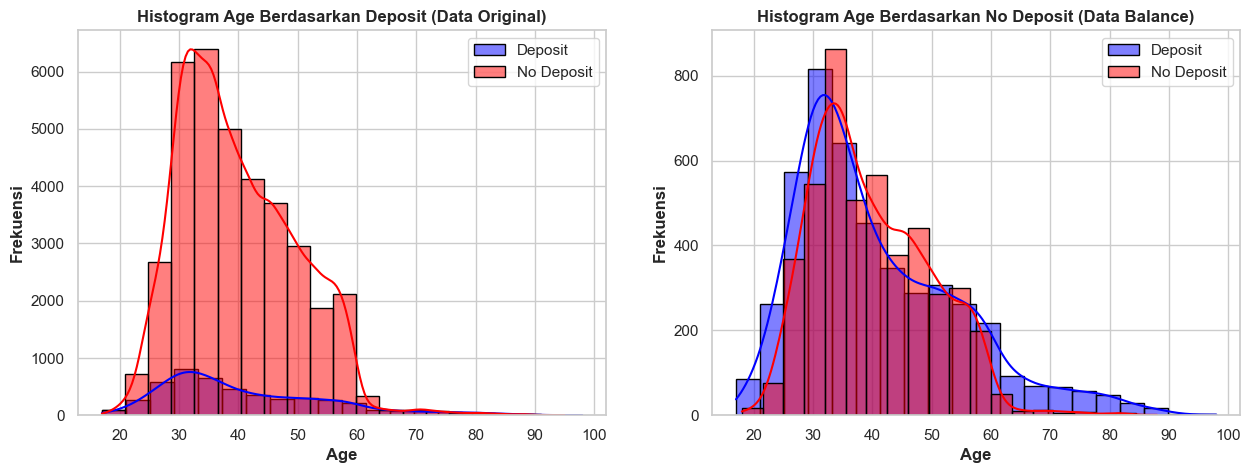

In [249]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['age'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['age'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Age Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['age'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['age'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Age Berdasarkan No Deposit (Data Balance)', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [250]:
from scipy.stats import spearmanr

# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['age'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: -0.018265451980061055
P-Value: 0.0785297202363989


In [251]:
from scipy.stats import mannwhitneyu, kstest

variable = 'age'
target_variable = 'deposit'
statistic, p_value = mannwhitneyu(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Mann-Whitney antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji Mann-Whitney antara age dan deposit:
U-statistic: 10987001.0
P-value: 0.0785311455826328
Tidak cukup bukti untuk menolak hipotesis nol.
Tidak terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara age dan deposit:
U-statistic: 0.08613032056027703
P-value: 5.150499406544982e-27
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



#### __Job__

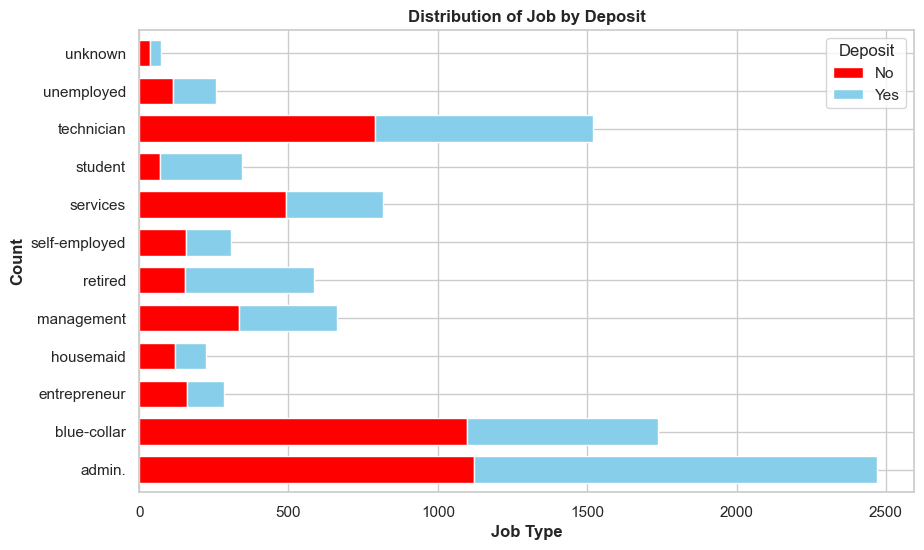

In [252]:
# Create a contingency table
contingency_job = pd.crosstab(df_balance['job'], df_balance['deposit'])

# Plot stacked bar chart
contingency_job.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(10, 6), width=0.7)

plt.title('Distribution of Job by Deposit', fontweight='bold')
plt.xlabel('Job Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [253]:
from scipy.stats import chi2_contingency

# Variable of interest
var_of_interest = 'job'

# Creating the contingency table for the selected variable
contingency_jon = pd.crosstab(df_balance[var_of_interest], df_balance['deposit'])

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_job)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for job: 449.6025698735141
P-value for job: 1.749935626492245e-89
Variable job has a significant relationship with deposit (reject H0)


#### __Marital__

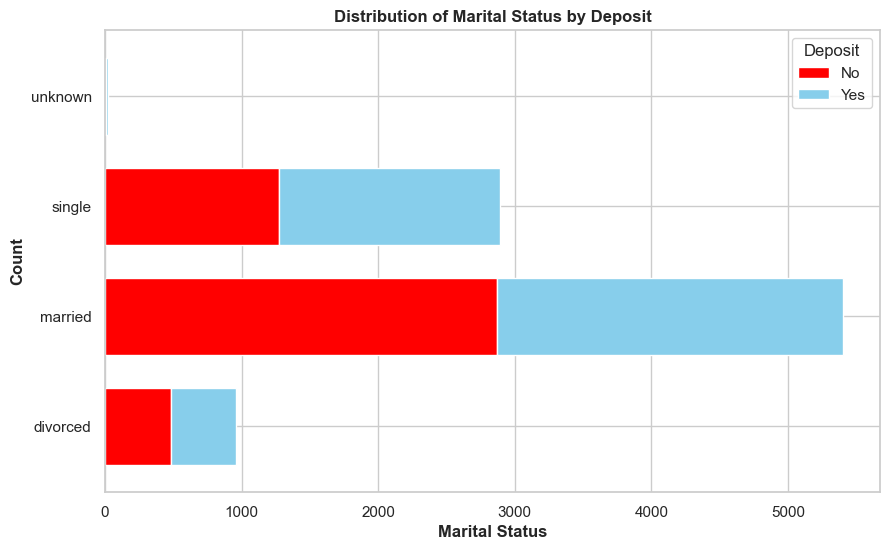

In [254]:
# Create a contingency table
contingency_marital = pd.crosstab(df_balance['marital'], df_balance['deposit'])

# Plot stacked bar chart
contingency_marital.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(10, 6), width=0.7)

plt.title('Distribution of Marital Status by Deposit', fontweight='bold')
plt.xlabel('Marital Status', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [255]:
# Variable of interest
var_of_interest = 'marital'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_marital)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for marital: 63.01493265877396
P-value for marital: 1.333146680452931e-13
Variable marital has a significant relationship with deposit (reject H0)


#### __Education__

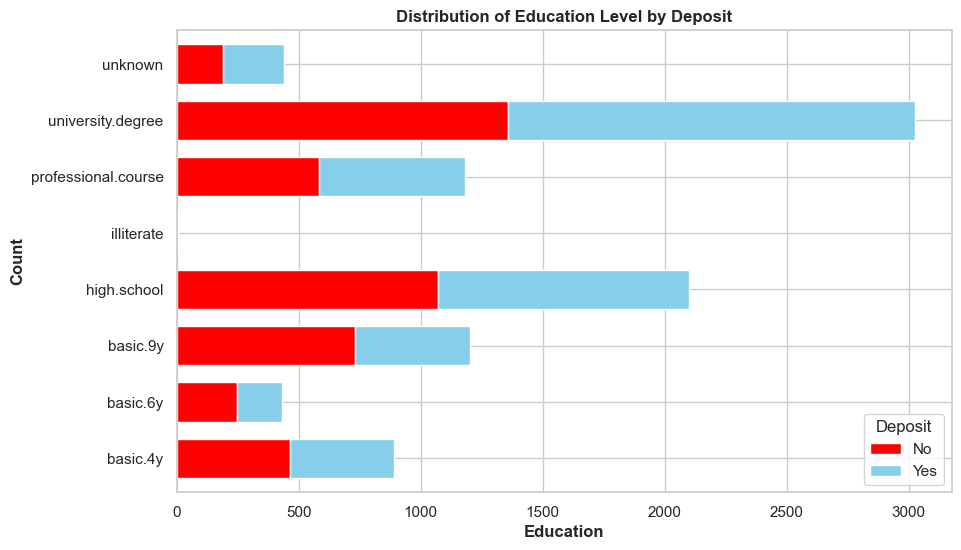

In [256]:
# Create a contingency table
contingency_education = pd.crosstab(df_balance['education'], df_balance['deposit'])

# Plot stacked bar chart
contingency_education.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(10, 6), width=0.7)

plt.title('Distribution of Education Level by Deposit', fontweight='bold')
plt.xlabel('Education', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [257]:
# Variable of interest
var_of_interest = 'education'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_education)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for education: 106.1245688208504
P-value for education: 5.838249856967512e-20
Variable education has a significant relationship with deposit (reject H0)


__Tabel Uji Statistik Variabel Numerical__

|   Age       | Mann-Whitney| K-S Test  | 
|-------------|-------------|-----------|
| U-statistic |86590115.5   | 0.086     |
| P-value     | 0.015       | 0.00      |
| Hipotesis   | HO Tolak    | HO Tolak  |
| Pengaruh    |Signifikan   |Signifikan |

__Tabel Uji Statistik Varibel Kategorikal__

| Chi-Squaare  | Job         | Marital        | Education     |
|--------------|-------------|----------------|---------------|
| U-statistic  | 961.74      | 122.95         | 192.84        |
|   P-value    | 0.00        | 0.00           | 0.00          |
|  Hipotesis   | HO ditolak  | HO ditolak     | HO ditolak    |
|   Pengaruh   | Signifikan  | Signifikan     | Signifikan    |

### <mark>__2. Riwayat Kontak dan Kampanye.__</mark> (Contact, Month, Day of Week, Duration, Campaign, Previous days, Previous Contact, Previous Outcome)

#### __Contact__

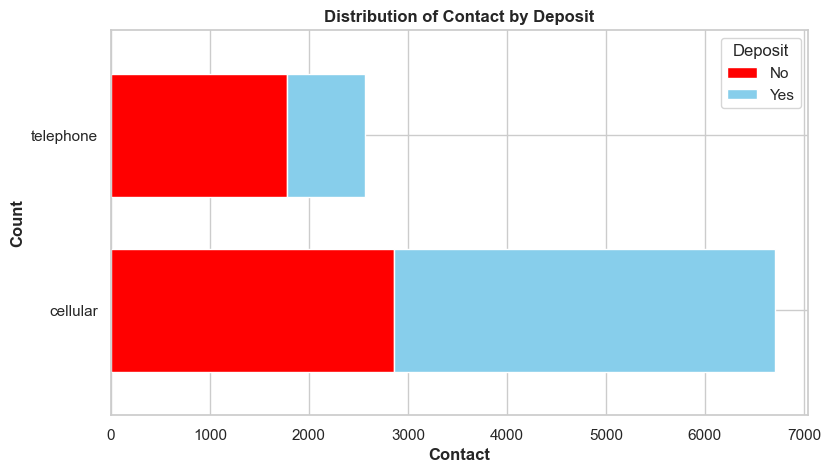

In [258]:
# Create a contingency table
contingency_contact = pd.crosstab(df_balance['contact'], df_balance['deposit'])

# Plot stacked bar chart
contingency_contact.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(9, 5), width=0.7)

plt.title('Distribution of Contact by Deposit', fontweight='bold')
plt.xlabel('Contact', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [259]:
# Variable of interest
var_of_interest = 'contact'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_contact)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for contact: 530.9276282435198
P-value for contact: 1.774755804051394e-117
Variable contact has a significant relationship with deposit (reject H0)


#### __Month__

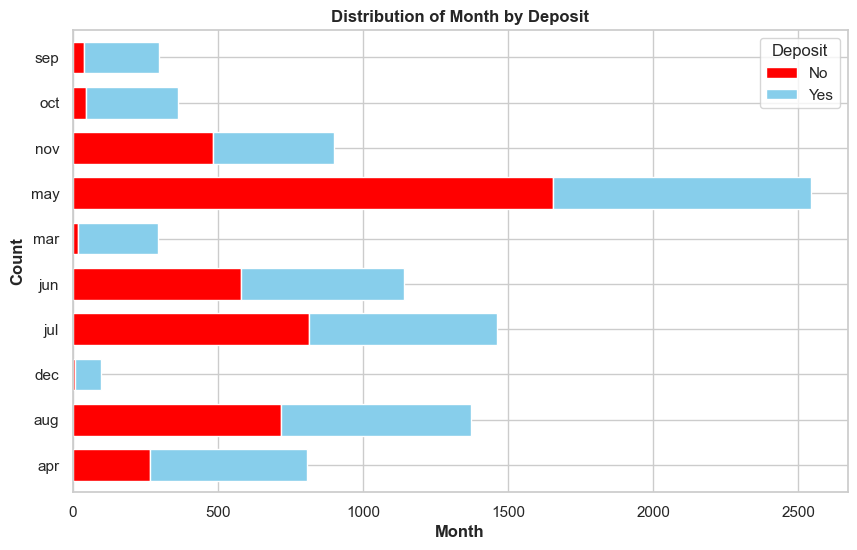

In [260]:
# Create a contingency table
contingency_month = pd.crosstab(df_balance['month'], df_balance['deposit'])

# Plot stacked bar chart
contingency_month.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(10, 6), width=0.7)

plt.title('Distribution of Month by Deposit', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [261]:
# Variable of interest
var_of_interest = 'month'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_month)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for month: 993.2238401771076
P-value for month: 4.984993623001518e-208
Variable month has a significant relationship with deposit (reject H0)


#### __Day of Week__

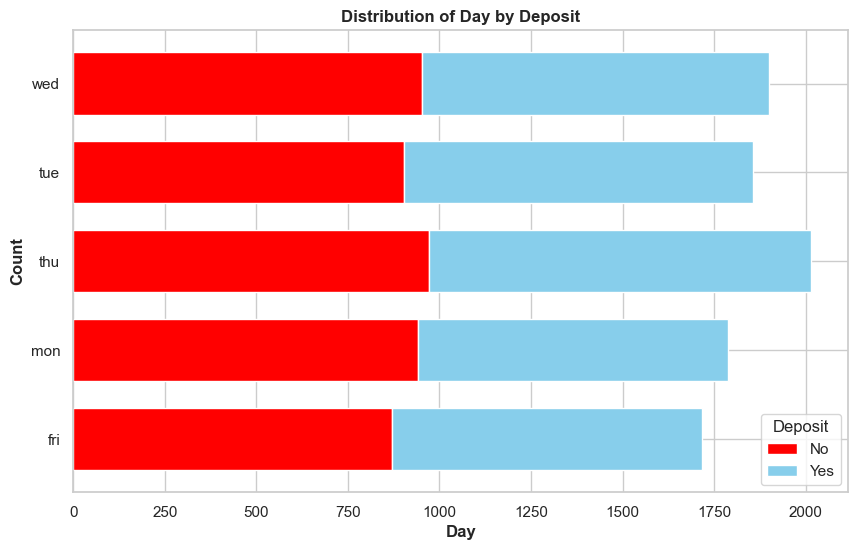

In [262]:
# Create a contingency table
contingency_day = pd.crosstab(df_balance['day_of_week'], df_balance['deposit'])

# Plot stacked bar chart
contingency_day.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(10, 6), width=0.7)

plt.title('Distribution of Day by Deposit', fontweight='bold')
plt.xlabel('Day', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [263]:
# Variable of interest
var_of_interest = 'day_of_week'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_day)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for day_of_week: 9.329241301537653
P-value for day_of_week: 0.05337671257636662
There is no statistical evidence for a relationship between day_of_week and deposit (cannot reject H0)


#### __Duration__

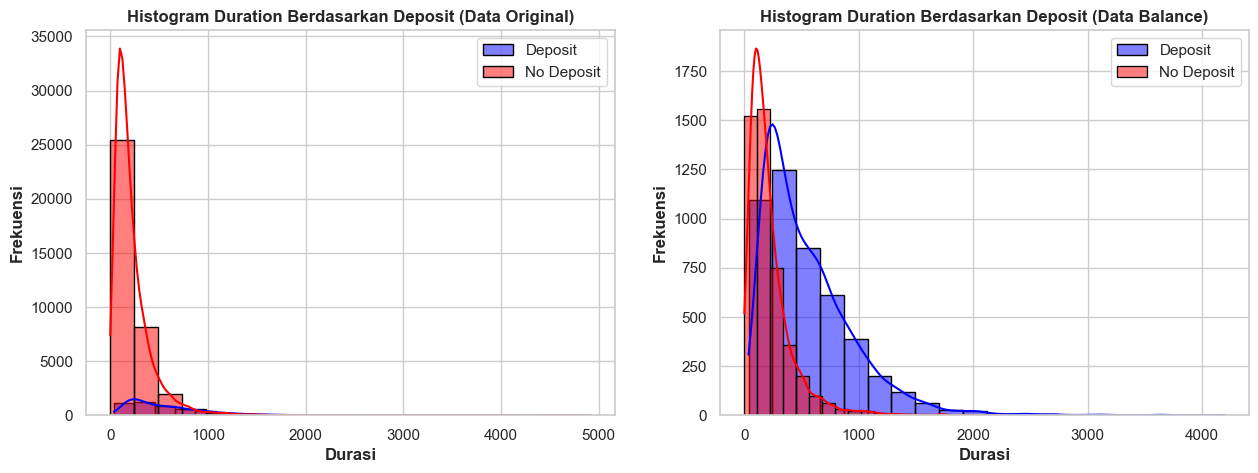

In [264]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['duration'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['duration'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Duration Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('Durasi', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['duration'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['duration'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Duration Berdasarkan Deposit (Data Balance)', fontweight='bold')
plt.xlabel('Durasi', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [265]:
# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['duration'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: 0.5531951918857616
P-Value: 0.0


In [266]:
variable = 'duration'
target_variable = 'deposit'
statistic, p_value = mannwhitneyu(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Mann-Whitney antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji Mann-Whitney antara duration dan deposit:
U-statistic: 3886851.5
P-value: 0.0
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara duration dan deposit:
U-statistic: 0.4639769884143524
P-value: 0.0
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



#### __Campaign__

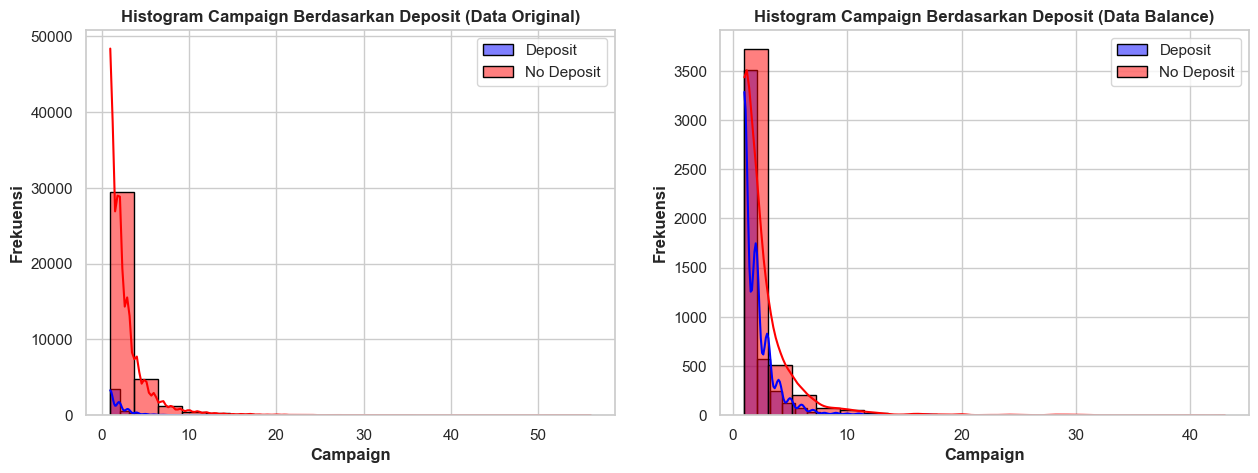

In [267]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['campaign'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['campaign'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Campaign Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('Campaign', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['campaign'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['campaign'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Campaign Berdasarkan Deposit (Data Balance)', fontweight='bold')
plt.xlabel('Campaign', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [268]:
# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['campaign'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: -0.09324239424225825
P-Value: 2.262733734120455e-19


In [269]:
variable = 'campaign'
target_variable = 'deposit'
statistic, p_value = mannwhitneyu(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Mann-Whitney antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji Mann-Whitney antara campaign dan deposit:
U-statistic: 11848218.0
P-value: 2.687055278786135e-19
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara campaign dan deposit:
U-statistic: 0.08082049879151998
P-value: 7.804890952010286e-24
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



#### __Previous Days__

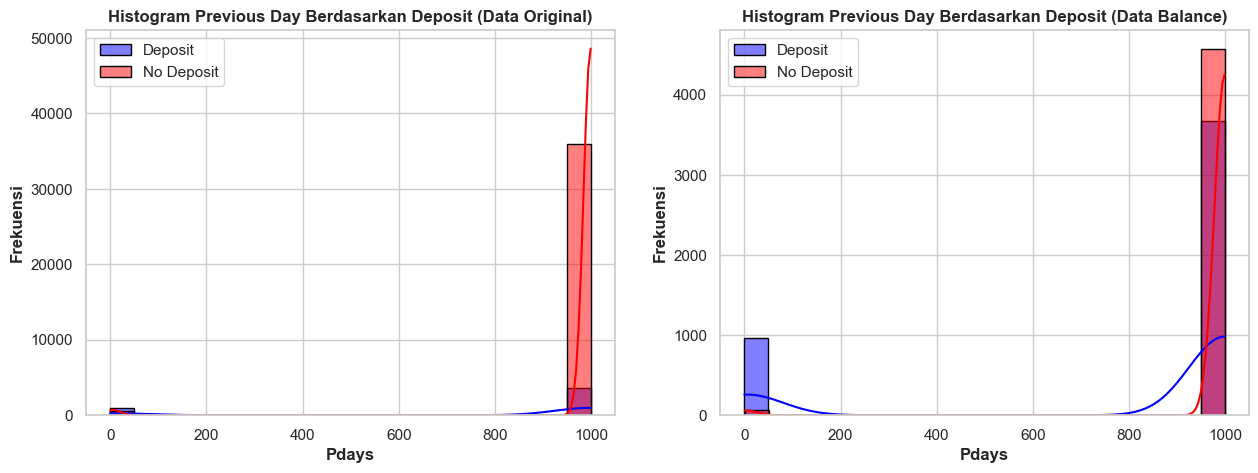

In [270]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['pdays'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['pdays'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Previous Day Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('Pdays', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['pdays'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['pdays'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Previous Day Berdasarkan Deposit (Data Balance)', fontweight='bold')
plt.xlabel('Pdays', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [271]:
# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['pdays'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: -0.3090194463355095
P-Value: 1.8463797202685432e-204


In [272]:
variable = 'pdays'
target_variable = 'deposit'
statistic, p_value = mannwhitneyu(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Mann-Whitney antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji Mann-Whitney antara pdays dan deposit:
U-statistic: 12854792.5
P-value: 1.1469911123919121e-194
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara pdays dan deposit:
U-statistic: 0.1934516023270354
P-value: 2.1036452155897435e-135
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



#### __Previous Contact__

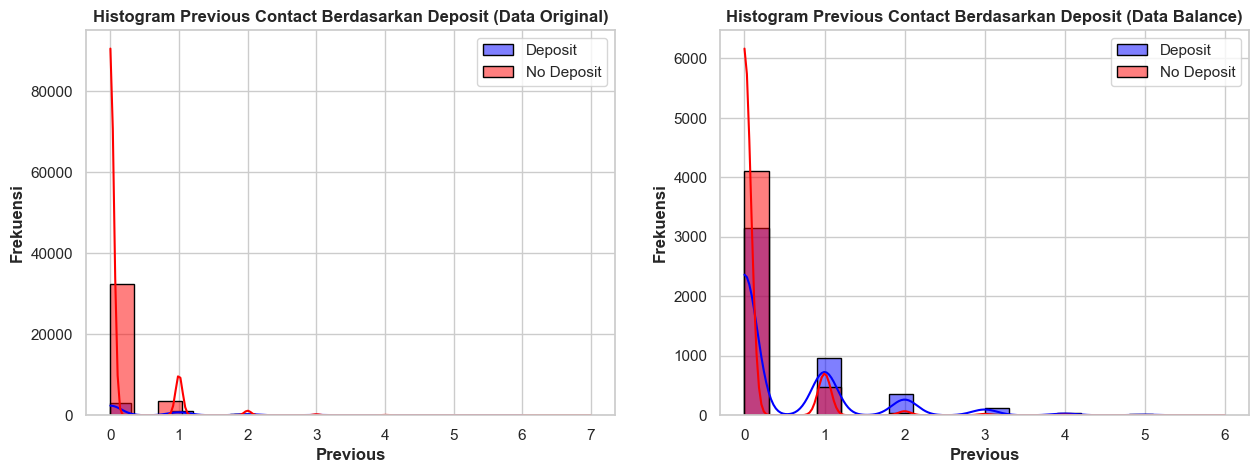

In [297]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['previous'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['previous'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Previous Contact Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('Previous', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['previous'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['previous'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Previous Contact Berdasarkan Deposit (Data Balance)', fontweight='bold')
plt.xlabel('Previous', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [298]:
# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['previous'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: 0.2596882779368623
P-Value: 7.385648112011051e-143


In [299]:
variable = 'previous'
target_variable = 'deposit'
statistic, p_value = mannwhitneyu(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Mann-Whitney antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji Mann-Whitney antara previous dan deposit:
U-statistic: 8432858.5
P-value: 4.476984455895485e-138
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara previous dan deposit:
U-statistic: 0.21020336258248995
P-value: 4.912574176309411e-160
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



#### __Previous Outcome__

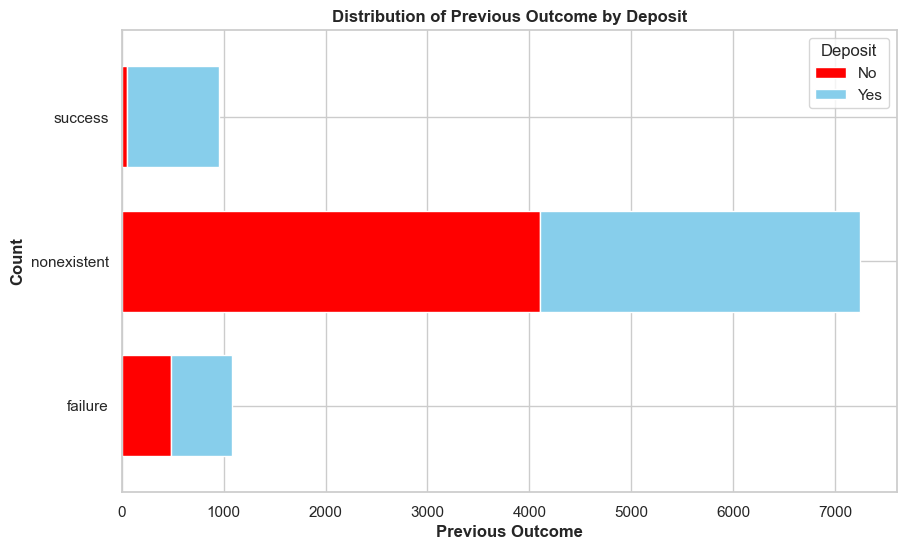

In [273]:
# Create a contingency table
contingency_poutcome = pd.crosstab(df_balance['poutcome'], df_balance['deposit'])

# Plot stacked bar chart
contingency_poutcome.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(10, 6), width=0.7)

plt.title('Distribution of Previous Outcome by Deposit', fontweight='bold')
plt.xlabel('Previous Outcome', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [274]:
# Variable of interest
var_of_interest = 'poutcome'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_poutcome)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for poutcome: 882.1348924394298
P-value for poutcome: 2.7979629516434667e-192
Variable poutcome has a significant relationship with deposit (reject H0)


__Tabel Uji Statistik Variabel Numerical__

|                   | Duration    | Campaign  | PDays       |Previous   |
|-------------------|-------------|-----------|-------------|-----------|
| __Mann-whitneyu__ |             |           |             |           | 
| U-statistic       |30773212.0   | 94103173.5| 101149077.0 | 8432858.5 |
| P-value           | 0.0         | 0.00      | 0.0         | 0.00 |
| Hipotesis     | HO ditolak    | HO ditolak  | HO ditolak  | HO ditolak |
| Pengaruh      |Signifikan   |Signifikan | Signifikan | Signifikan |
| |   | |  |  |
| __K-S Test__ |   | |  |  |
| U-statistic   |0.47   | 0.08     | 0.1934 | 0.21 |
| P-value       | 0.0     | 0.00      | 0.00 | 0.00 |
| Hipotesis     | HO ditolak    | HO ditolak  | HO ditolak | HO ditolak |
| Pengaruh      |Signifikan   |Signifikan | Signifikan | Signifikan |

__Tabel Uji Statistik Variabel Kategorikal__

| Chi-Squaare  | Contact         | Month        | Day of Week   | POutcome|
|--------------|-----------------|--------------|---------------|---------|
| U-statistic  | 530.92      | 993.22         | 9.32       | 882.13 |
|   P-value    | 0.00        | 0.00           | 0.053         | 0.00 |
|  Hipotesis   | HO ditolak  | HO ditolak     | HO diterima    | HO ditolak |
|   Pengaruh   | Signifikan  | Signifikan     | Tidak Signifikan    | Signifikan |



### <mark>__3. Status Keuangan dan Pembiayaan.__</mark> (Default, Housing, Loan)

#### __Default__

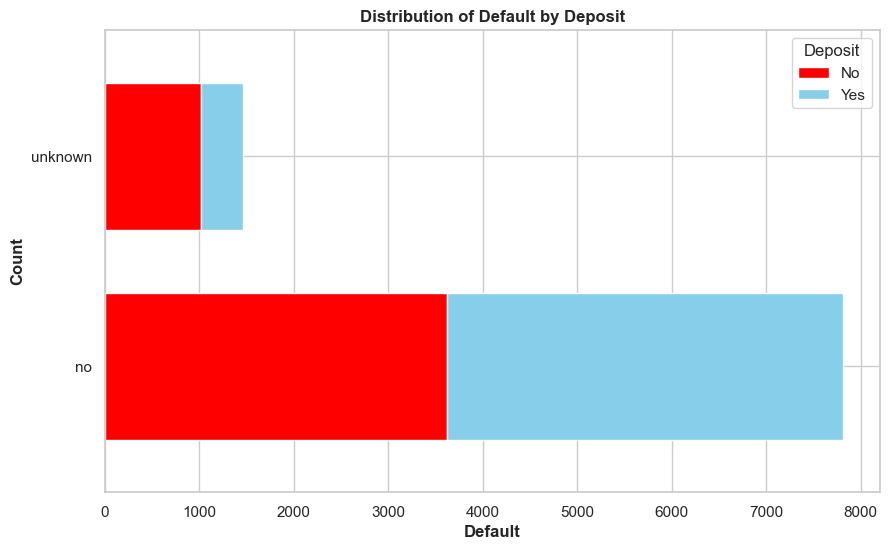

In [275]:
# Create a contingency table
contingency_default = pd.crosstab(df_balance['default'], df_balance['deposit'])

# Plot stacked bar chart
contingency_default.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(10, 6), width=0.7)

plt.title('Distribution of Default by Deposit', fontweight='bold')
plt.xlabel('Default', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [276]:
# Variable of interest
var_of_interest = 'default'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_default)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for default: 270.01725063323363
P-value for default: 1.1249923076057876e-60
Variable default has a significant relationship with deposit (reject H0)


#### __Housing__

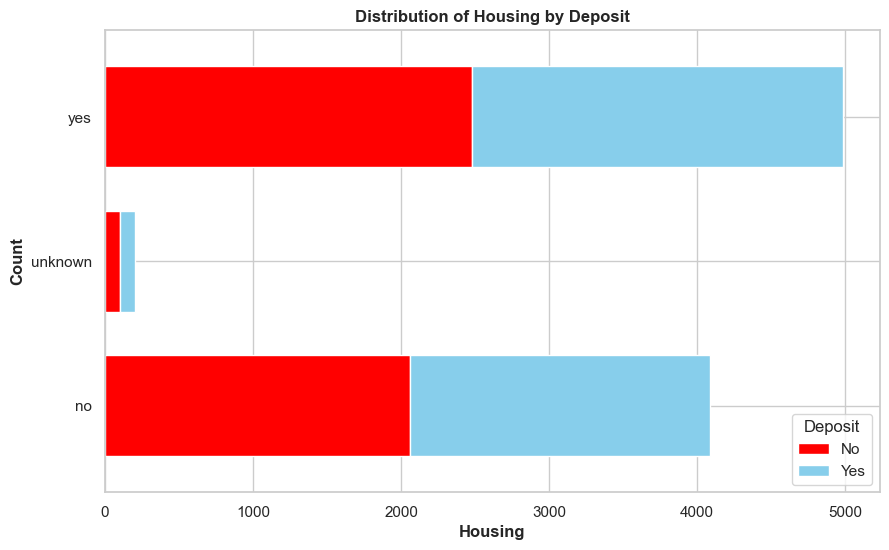

In [277]:
# Create a contingency table
contingency_housing = pd.crosstab(df_balance['housing'], df_balance['deposit'])

# Plot stacked bar chart
contingency_housing.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(10, 6), width=0.7)

plt.title('Distribution of Housing by Deposit', fontweight='bold')
plt.xlabel('Housing', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [278]:
# Variable of interest
var_of_interest = 'housing'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_housing)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for housing: 0.8444864235856644
P-value for housing: 0.6555745765345097
There is no statistical evidence for a relationship between housing and deposit (cannot reject H0)


#### __Loan__

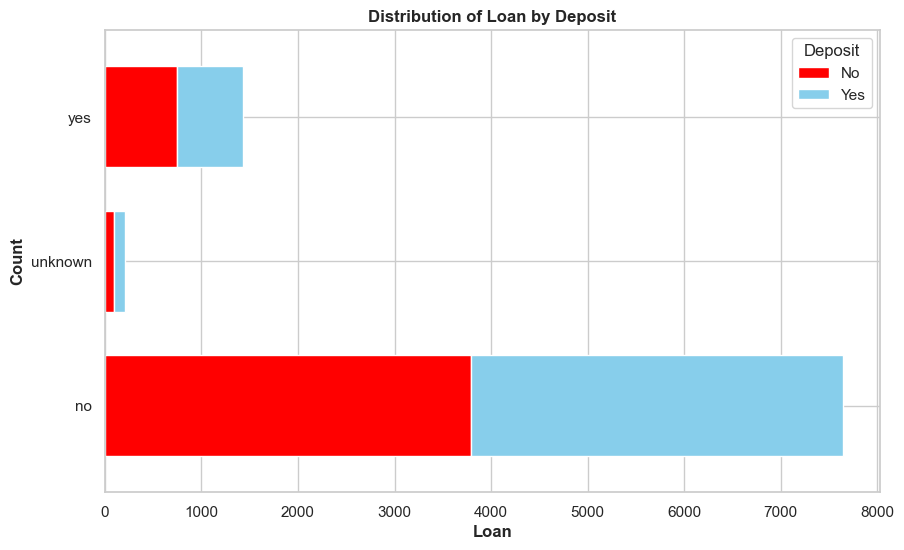

In [279]:
# Create a contingency table
contingency_loan = pd.crosstab(df_balance['loan'], df_balance['deposit'])

# Plot stacked bar chart
contingency_loan.plot(kind='barh', stacked=True, color=['red', 'skyblue'], figsize=(10, 6), width=0.7)

plt.title('Distribution of Loan by Deposit', fontweight='bold')
plt.xlabel('Loan', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

In [280]:
# Variable of interest
var_of_interest = 'loan'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_loan)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for loan: 3.3840320295407187
P-value for loan: 0.18414790462812886
There is no statistical evidence for a relationship between loan and deposit (cannot reject H0)


__Tabel Uji Statistik Varibel Kategorikal__

| Chi-Squaare  | Default         | Housing        | Loan     |
|--------------|-------------|----------------|---------------|
| U-statistic  |406.56      |  5.74        | 1.1        |
|   P-value    | 0.00        | 0.057          | 0.57          |
|  Hipotesis   | HO ditolak  | HO diterima     | HO diterima    |
|   Pengaruh   | Signifikan  | Tidak Signifikan     | Tidak Signifikan    |

### <mark>__4. Kondisi Ekonomi dan Suku Bunga.__</mark> (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed)

#### __emp.var.rate__

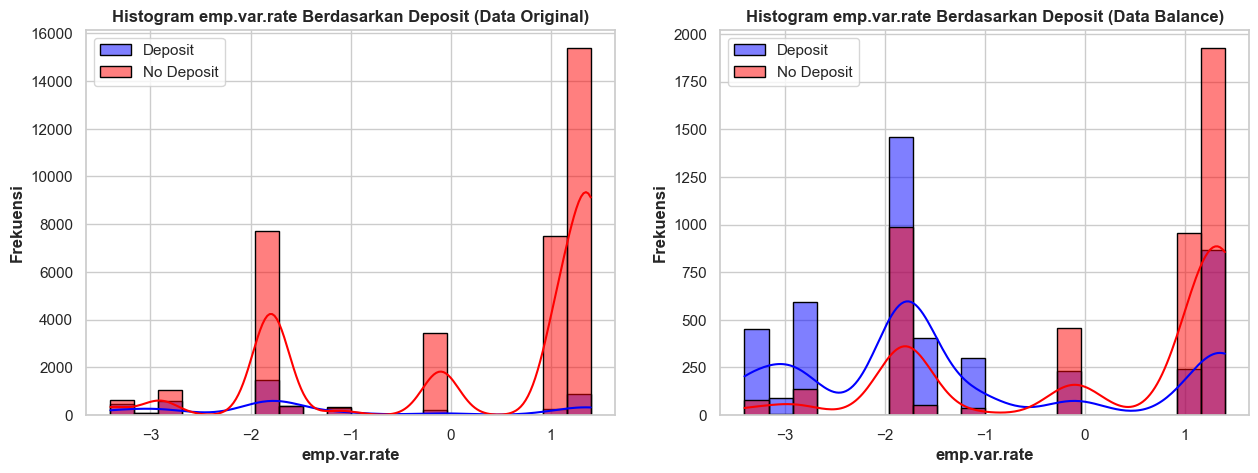

In [281]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['emp.var.rate'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['emp.var.rate'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram emp.var.rate Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('emp.var.rate', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['emp.var.rate'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['emp.var.rate'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram emp.var.rate Berdasarkan Deposit (Data Balance)', fontweight='bold')
plt.xlabel('emp.var.rate', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [282]:
# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['emp.var.rate'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: -0.3821838374839331
P-Value: 0.0


In [283]:
from scipy import stats

variable = 'emp.var.rate'
target_variable = 'deposit'
statistic, p_value = stats.ttest_ind(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji T-Test antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji T-Test antara emp.var.rate dan deposit:
U-statistic: 45.542272554124125
P-value: 0.0
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara emp.var.rate dan deposit:
U-statistic: 0.4323553625368486
P-value: 0.0
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



#### __cons.price.idx__

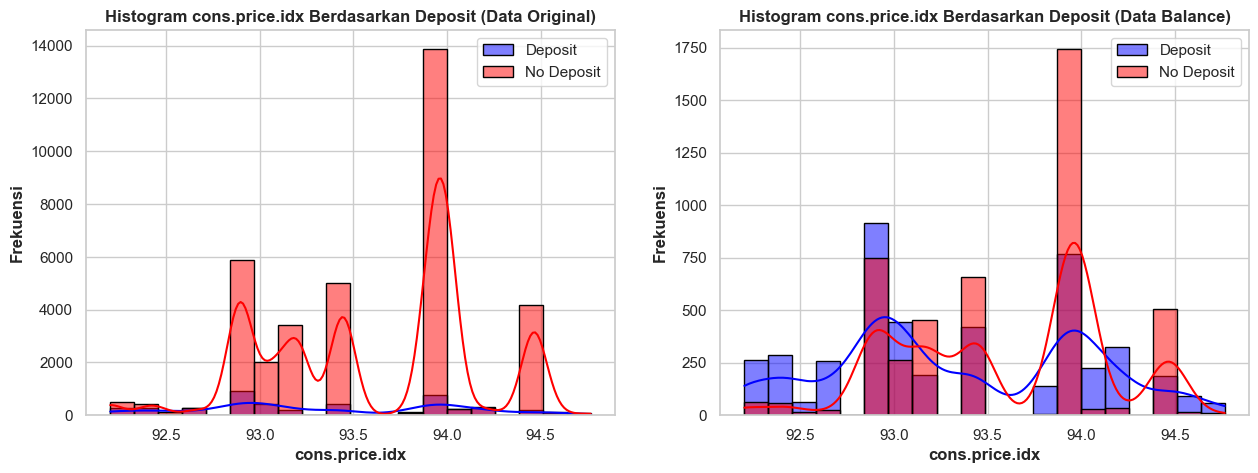

In [284]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['cons.price.idx'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['cons.price.idx'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram cons.price.idx Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('cons.price.idx', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['cons.price.idx'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['cons.price.idx'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram cons.price.idx Berdasarkan Deposit (Data Balance)', fontweight='bold')
plt.xlabel('cons.price.idx', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [285]:
# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['cons.price.idx'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: -0.18717843204394133
P-Value: 6.422980864629098e-74


In [286]:
variable = 'cons.price.idx'
target_variable = 'deposit'
statistic, p_value = stats.ttest_ind(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji T-Test antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji T-Test antara cons.price.idx dan deposit:
U-statistic: 18.63699424914715
P-value: 3.914875112285973e-76
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara cons.price.idx dan deposit:
U-statistic: 0.22798372458377758
P-value: 1.637245002158012e-188
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



#### __cons.conf.idx__

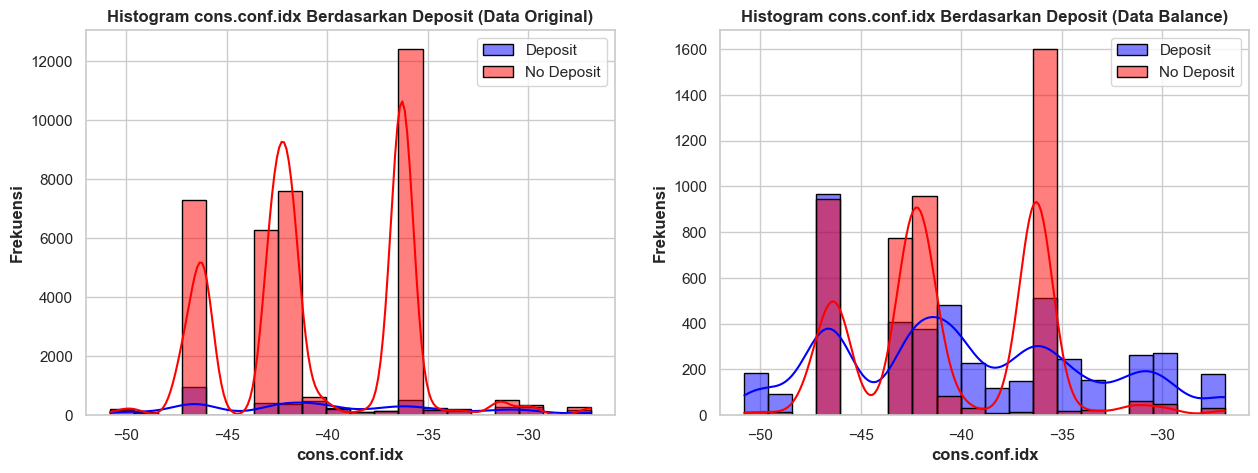

In [287]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['cons.conf.idx'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['cons.conf.idx'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram cons.conf.idx Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('cons.conf.idx', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['cons.conf.idx'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['cons.conf.idx'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram cons.conf.idx Berdasarkan Deposit (Data Balance)', fontweight='bold')
plt.xlabel('cons.conf.idx', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [288]:
# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['cons.conf.idx'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: 0.0624893577736612
P-Value: 1.6994794706425658e-09


In [289]:
variable = 'cons.conf.idx'
target_variable = 'deposit'
statistic, p_value = stats.ttest_ind(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji T-Test antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji T-Test antara cons.conf.idx dan deposit:
U-statistic: -7.069048957716759
P-value: 1.6726409455353385e-12
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara cons.conf.idx dan deposit:
U-statistic: 0.19969961617130239
P-value: 2.4206601636266428e-144
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



#### __euribor3m__

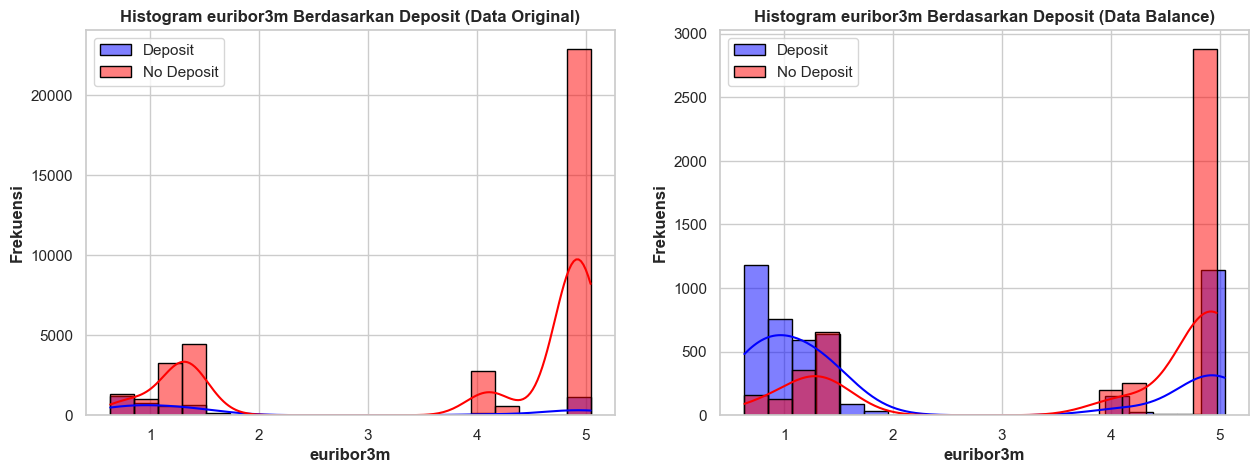

In [290]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['euribor3m'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['euribor3m'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram euribor3m Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('euribor3m', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['euribor3m'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['euribor3m'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram euribor3m Berdasarkan Deposit (Data Balance)', fontweight='bold')
plt.xlabel('euribor3m', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [291]:
# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['euribor3m'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: -0.42012932168354183
P-Value: 0.0


In [292]:
variable = 'euribor3m'
target_variable = 'deposit'
statistic, p_value = stats.ttest_ind(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji T-Test antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji T-Test antara euribor3m dan deposit:
U-statistic: 47.785187491504196
P-value: 0.0
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara euribor3m dan deposit:
U-statistic: 0.43257092623592164
P-value: 0.0
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



#### __nr.employed__

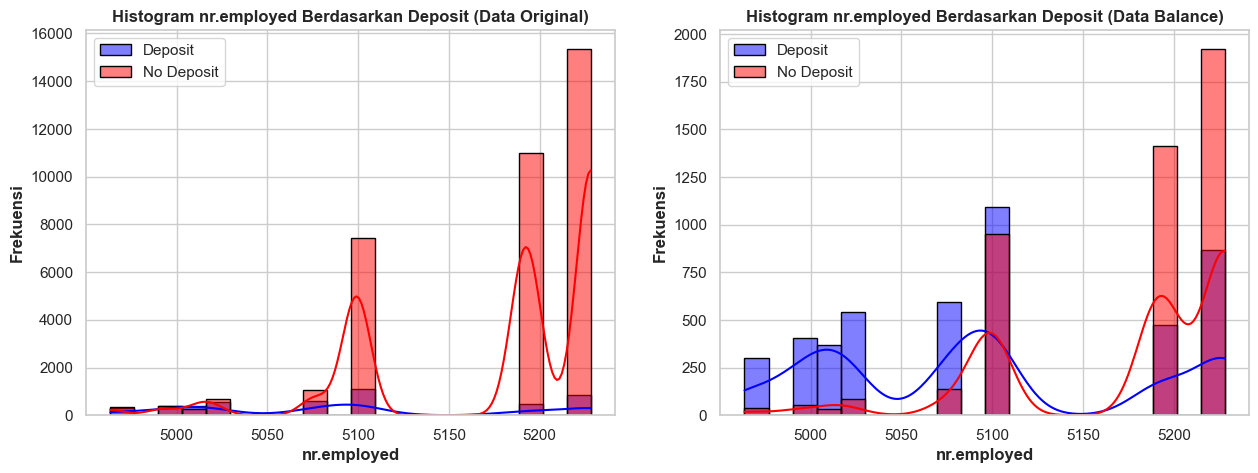

In [293]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Setel ukuran plot
plt.figure(figsize=(15, 5))

# Subplot untuk deposit = 1 di df dan df_balance
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['nr.employed'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['nr.employed'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram nr.employed Berdasarkan Deposit (Data Original)', fontweight='bold')
plt.xlabel('nr.employed', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Subplot untuk deposit = 0 di df dan df_balance
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['nr.employed'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['nr.employed'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram nr.employed Berdasarkan Deposit (Data Balance)', fontweight='bold')
plt.xlabel('nr.employed', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.legend()

# Tampilkan plot
plt.show()

In [294]:
# Menghitung koefisien korelasi Spearman
correlation, p_value = spearmanr(df_balance['nr.employed'], df_balance['deposit'])

print(f"Koefisien Korelasi Spearman: {correlation}")
print(f"P-Value: {p_value}")

Koefisien Korelasi Spearman: -0.4390195391075585
P-Value: 0.0


In [295]:
variable = 'nr.employed'
target_variable = 'deposit'
statistic, p_value = stats.ttest_ind(df_balance[df_balance[target_variable] == 0][variable], df_balance[df_balance[target_variable] == 1][variable])

# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji T-Test antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

statistic, p_value = kstest(df[df[target_variable] == 0][variable], df[df[target_variable] == 1][variable])
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.05

# Cetak hasil
print(f"Uji Kolmogorov-smirnov antara {variable} dan {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis nol ditolak.")
    print("Terdapat perbedaan signifikan antara dua grup atau variabel.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak terdapat perbedaan signifikan antara dua grup atau variabel.")

print()

Uji T-Test antara nr.employed dan deposit:
U-statistic: 50.634818093777774
P-value: 0.0
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.

Uji Kolmogorov-smirnov antara nr.employed dan deposit:
U-statistic: 0.4323553625368486
P-value: 0.0
Hipotesis nol ditolak.
Terdapat perbedaan signifikan antara dua grup atau variabel.



__Tabel Uji Statistik Variabel Numerical__

|            | emp.var.rate| cons.price.idx  | cons.conf.idx  |euribor3m  | nr.employed |
|-------------|-------------|-----------|-----------|------------|--------|
| __T-Test__ |   | |  | | |
| U-statistic   |63.41   | 27.88    | -11.13 | 65.63 | 76.97 |
| P-value       | 0.0      | 0.00      | 0.00 | 0.0 | 0.0 |
| Hipotesis     | HO ditolak    | HO ditolak  | HO ditolak  | HO ditolak | HO ditolak |
| Pengaruh      |Signifikan   |Signifikan | Signifikan | Signifikan | Signifikan |
| |   | |  | | |
| __K-S Test__ |   | |  | | |
| U-statistic   |0.43   | 0.23     | 0.2 | 0.43 | 0.43 |
| P-value       | 0.0     | 0.00      | 0.00 | 0.0 | 0.0 |
| Hipotesis     | HO ditolak    | HO ditolak  | HO ditolak | HO ditolak | HO ditolak |
| Pengaruh      |Signifikan   |Signifikan | Signifikan | Signifikan | Signifikan |